In [3]:
# from IPython.core.display import HTML
import pandas as pd 

In [10]:
spending_df = pd.read_csv('https://www.dropbox.com/s/ce9b47nzt3sx7y5/spending_10k.csv?dl=1', index_col="unique_id", dtype={"doctor_id":"object"})
spending_df.head(10)

,doctor_id,specialty,medication,nb_beneficiaries,spending
unique_id,,,,,
NX531425,1255626040,FAMILY PRACTICE,METFORMIN HCL,30,135.24
QG879256,1699761833,FAMILY PRACTICE,ALLOPURINOL,30,715.76
FW363228,1538148804,INTERNAL MEDICINE,LOSARTAN POTASSIUM,146,1056.47
WD733417,1730200619,PSYCHIATRY,OLANZAPINE,13,28226.97
XW149832,1023116894,FAMILY PRACTICE,PRAVASTATIN SODIUM,348,8199.48
QT485324,1952359671,FAMILY PRACTICE,HYDROCHLOROTHIAZIDE,57,247.01
NA293426,1841235223,FAMILY PRACTICE,SEVELAMER CARBONATE,11,4869.32
IF945618,1326095662,INTERNAL MEDICINE,FLUTICASONE/SALMETEROL,20,7832.46
PH384257,1821126830,HEMATOLOGY/ONCOLOGY,ZOLPIDEM TARTRATE,14,65.21


### Overview


* In this section, we will tackle the handy `groupby` method.

* We also cover the split-apply-combine scheme to:

  * Aggregate data in each group
  * Transform data in each group
  * Filter the data in each group
  * Thin the data in each group

### `group_by` and `DataFrame` groups

* The `groupby()` method is used to group the data using values from one or more columns.

   * `groupby` takes as input one or more column labels, which it uses to group the data.

```python
df_1.groupby("X")
```

![](https://www.dropbox.com/s/86bi697t59zmkdn/groupby.png?dl=1)



### Identifying Groups from a GroupBy Object


```python
spending_df.groupby('specialty')
```

![](https://www.dropbox.com/s/bs8o34e4s7bdqa8/group_by_specialty.png?dl=1)

* The `groupby` method returns an object of type `DataFrameGroupBy.`
  * This is not a `DataFrame`, and does not, therefore, have the `DataFrame` methods discussed previously 

* We can get `DataFrameGroupBy`  element using a valid `groupby` column(s) value(s)


In [3]:
x = spending_df.groupby('specialty')
type(x)

pandas.core.groupby.generic.DataFrameGroupBy

In [12]:
spending_by_specialty = spending_df.groupby('specialty')

addiction_med_group = spending_by_specialty.get_group("ADDICTION MEDICINE")
addiction_med_group

,doctor_id,specialty,medication,nb_beneficiaries,spending
unique_id,,,,,
VG585760,1801032297,ADDICTION MEDICINE,LAMOTRIGINE,11,82.62
GJ278932,1134139991,ADDICTION MEDICINE,BUSPIRONE HCL,49,817.88
TX420809,1801032297,ADDICTION MEDICINE,LORAZEPAM,14,19.56


### `groupby` and Group-Specific Processing

* An ideal use-case for `groupby` consists of applying operations to each group independently.

* For instance, to compute the total spending by `specialty`, we need to:
  * Split the data by `specialty`.
  * Sum the total `spending` for each type of `specialty`
  * Combine and return the sums for each group into as a new `DataFrame`.




### Split-Apply-Combine Paradigm

* `groupby()` is often applied in the context of the data processing paradigm called "split-apply-combine".

  * **Split**: you need to split the data into chunks defined using one or more columns.
    * This is typically done using `groupby`.
  * **Apply**: apply some operation to the chunks generated.
    * Ex. Count the number of rows in each chunk, average the values for a specific column, etc.
  * **Combine**: combine the results of the applied operation into a new `DataFrame`.




### Split-Apply-Combine Example

![](https://www.dropbox.com/s/aecufw3mfu2mlah/split_apply_combine_example.png?dl=1)

* The type of Split-Apply-Combine applied here is referred to as aggregation.
  * Aggregations refer to any operation that aggregates (reduces) group data to a single value.

### The 3 ( or 3  $\frac{1}{2}$) Classes of Opearations on Groups


* Three are 3 formal classes of split-apply-combine operations that can be applied to group data.

  * I include a variant ($\frac{1}{2}$ a class) which I think is useful to better classify split-apply-combine operations.


1\.$~~$__Aggregations__ generate a single value for each group
   * E.g., Sum the spending by specialty
  
2\.$~~$ __Transformations__ convert the data and generate a group of the same size as the original group.
   * E.g., Convert the currency by country for some datasets that contains medication cost by country.

3\.$~~$ __Filters__ retain or discard a group based on group-specific boolean computations.
   * E.g., drop specialty if the sum of spending is below some threshold

3$\frac{1}{2}$\.$~$"__Thinning__" drops entries in a group based on some defined logic.
  * E.g., compute how far off are the group values from the group mean.

### Aggregations

- __Aggregations__ aggregate the data in each group, i.e., they reduce the data in each group to a single value. 

  * This includes, for instance, computing group sums, means, maximums, minimums, _etc_.



![](https://www.dropbox.com/s/9q54na9szs5syi5/aggregate.png?dl=1)



### Transforming Group Data

* __Transform__ will trnsform the data in a group-specific way.

   * E.g., transform the value by dividing it by the group mean

*  The number of entries per group resulting from a transformation is the same as the number of entries in the group before the transformation.



- The diagram below shows an example where the data in column "Y" in transformed by dividing it by the group mean.

![](https://www.dropbox.com/s/nf8lg0lqk3yxf7k/transform_2.png?dl=1)


### Filtering Group Data

* Consist of dropping or retaining that group in a way that depends on a group-specific computation that returns `True` or `False`. 

* For instance, we can filter specialties that don't have enough entries or for which the mean `spending` if below a certain threshold.
  * Groups are either retained or discarded. Groups that are retained are unmodified.


- The diagram below shows an example where groups are filtered if their sum for column `Y` is less than 10.

![](https://www.dropbox.com/s/ncmv2xsupjok7va/filter.png?dl=1)

### Thinning Group Data

* Consist of reducing the number of entries using a group-specific operation.

* Thinning can be useful to, for instance:
  * Sub-sample the data at the group level (create a blanced dataset)
  * Returning the top `n` entries in each group
  * etc. 

  * As opposed to aggregating functions, thinning does not have to reduce the group into a single entry; although it could

    
![](https://www.dropbox.com/s/m4p4f5nk55w2ni2/thin.png?dl=1) 


### Aggregating the Data Using `groupby`

* Aggregation is commonly used to compute summary statistics on each of the groups.

* Some of the interesting/important summary aggregation methods `DataFrameGroupBy` objects are:

|Methods           |        Decription                              |
|:-----------------|:-----------------------------------------------|
| `mean`, `median` | Computes the mean and the median in each group | 
| `min` , `max`    | computes the min and max in each group         | 
| `size`           | computes the number of values in each group    | 

* The function applies to all valid columns that are available after using the `groupby` argument as an index




##### Aggregating the Data Using `groupby` Cont'd 

- The functions above all use the same syntax:
 
```python
spending_df.groupby('specialty').sum()
# or
spending_df.groupby('specialty').min()
```


In [8]:
df = pd.DataFrame({"A":[1,1,2,2,3,3], "B":[1,2,3,4,5,6], "C":["A","B","C","D","E","F"]})

df.groupby("A").sum()


,B
A,
1,3
2,7
3,11


In [6]:
spending_df.head()

,doctor_id,specialty,medication,nb_beneficiaries,spending
unique_id,,,,,
NX531425,1255626040,FAMILY PRACTICE,METFORMIN HCL,30,135.24
QG879256,1699761833,FAMILY PRACTICE,ALLOPURINOL,30,715.76
FW363228,1538148804,INTERNAL MEDICINE,LOSARTAN POTASSIUM,146,1056.47
WD733417,1730200619,PSYCHIATRY,OLANZAPINE,13,28226.97
XW149832,1023116894,FAMILY PRACTICE,PRAVASTATIN SODIUM,348,8199.48


In [7]:
spending_df.groupby('specialty').sum().head(10)


,nb_beneficiaries,spending
specialty,,
ADDICTION MEDICINE,74,920.06
ALLERGY/IMMUNOLOGY,1063,189174.06
ANESTHESIOLOGY,1673,142804.73
CARDIAC ELECTROPHYSIOLOGY,1041,225543.62
CARDIAC SURGERY,33,12432.92
CARDIOLOGY,29638,1915787.90
CERTIFIED CLINICAL NURSE SPECIALIST,1146,114057.40
CERTIFIED NURSE MIDWIFE,58,14763.47
CLINIC/CENTER,23,3110.16



### Applying Functions to Group Columns

* The method `agg()` can be used where complex or custom aggregation logic is required.
* Note tht `agg` applies to a `DataFrameGroupBy` object
  *  The method `agg` takes a function (or a list of functions) and uses it (them) to aggregate the group's colum(s)

* Example, we can use `sum_spending_CAD` to return the sum of the spending in Canadian Dollars.


```python
def sum_spending_CAD(x):
    return x.sum() * 1.32

spending_by_specialty['spending'].agg(sum_spending_CAD)
```


* `agg` can take a dictionary of functions to aggregate on.
    * Required for aggregating more than one column 

    ```python 
    spending_by_specialty.agg({'nb_beneficiaries' :sum,
                               'spending' : sum_spending_CAD)
    ```

* `agg` can take a list of function to apply to each column functions to aggregate on.
  
    `
    spending_by_specialty.agg([min,max,sum])
    `

In [15]:
def sum_spending_CAD(x):
    return x.sum() * 1.27

# format
(
    spending_by_specialty.agg({ 'nb_beneficiaries': sum, 'spending': sum_spending_CAD })
                         .head(5)
)



,nb_beneficiaries,spending
specialty,,
ADDICTION MEDICINE,74,1168.4762
ALLERGY/IMMUNOLOGY,1063,240251.0562
ANESTHESIOLOGY,1673,181362.0071
CARDIAC ELECTROPHYSIOLOGY,1041,286440.3974
CARDIAC SURGERY,33,15789.8084


In [18]:
# note that sum, min and max here are functions
spending_by_specialty[['spending', 'nb_beneficiaries']].agg([sum, min, max]).head()

spending                   nb_beneficiaries      \
                                 sum     min       max              sum min   
specialty                                                                     
ADDICTION MEDICINE            920.06   19.56    817.88               74  11   
ALLERGY/IMMUNOLOGY         189174.06  109.80  52389.61             1063  11   
ANESTHESIOLOGY             142804.73   35.33  34073.91             1673  12   
CARDIAC ELECTROPHYSIOLOGY  225543.62   69.85  89101.54             1041  12   
CARDIAC SURGERY             12432.92  442.91  11990.01               33  15   

                                
                           max  
specialty                       
ADDICTION MEDICINE          49  
ALLERGY/IMMUNOLOGY         297  
ANESTHESIOLOGY             419  
CARDIAC ELECTROPHYSIOLOGY  188  
CARDIAC SURGERY             18

In [19]:
spending_by_specialty.agg({'nb_beneficiaries' :min,
                           'spending' : max}).head()


,nb_beneficiaries,spending
specialty,,
ADDICTION MEDICINE,11,817.88
ALLERGY/IMMUNOLOGY,11,52389.61
ANESTHESIOLOGY,12,34073.91
CARDIAC ELECTROPHYSIOLOGY,12,89101.54
CARDIAC SURGERY,15,11990.01


In [20]:
spending_by_specialty.agg({'nb_beneficiaries' :[min, sum],
                           'spending' : max}).head()


nb_beneficiaries        spending
                                       min   sum       max
specialty                                                 
ADDICTION MEDICINE                      11    74    817.88
ALLERGY/IMMUNOLOGY                      11  1063  52389.61
ANESTHESIOLOGY                          12  1673  34073.91
CARDIAC ELECTROPHYSIOLOGY               12  1041  89101.54
CARDIAC SURGERY                         15    33  11990.01

### Transforming  the `groupby` `DataFrames`

- As opposed to aggregations, which reduce the data into a single value, transformations modify the data but don't change the `shape` (dimension) of the groups

- Transformations are useful for applying operations that are group specific

### Transforming the Data in `groupby` Cont'd


- The example below computes the percent contribution of each entry to each specialty by applying a transformation that normalizes the entry's spending over the total spending in that specialty. 

![](https://www.dropbox.com/s/ewfaj5rjszbvzz3/transform_spending.png?dl=1)


In [16]:
spending_by_specialty["spending"].get_group("ADDICTION MEDICINE")

unique_id
VG585760    82.620
GJ278932   817.880
TX420809    19.560
Name: spending, dtype: float64

### Applying a Transformation

- Applying a transformation is done using the method called `transform`.


- The method `transform` takes as input a function name, which it calls on each group of the `DataFrameGroupBy` object

In [24]:
def my_function(x):
    return (x   / x.sum() ) * 100
    
spending_by_specialty['spending'].transform(my_function).head(10)



unique_id
NX531425    0.002075
QG879256    0.010985
FW363228    0.010855
WD733417    1.614442
XW149832    0.125835
QT485324    0.003791
NA293426    0.074728
IF945618    0.080474
PH384257    0.005987
JY407340    0.008853
Name: spending, dtype: float64

In [26]:
spending_df["spending_pct"] = spending_by_specialty['spending'].transform(my_function)

spending_df.head()

,doctor_id,specialty,medication,nb_beneficiaries,spending,spending_pct
unique_id,,,,,,
NX531425,1255626040,FAMILY PRACTICE,METFORMIN HCL,30,135.24,0.002075
QG879256,1699761833,FAMILY PRACTICE,ALLOPURINOL,30,715.76,0.010985
FW363228,1538148804,INTERNAL MEDICINE,LOSARTAN POTASSIUM,146,1056.47,0.010855
WD733417,1730200619,PSYCHIATRY,OLANZAPINE,13,28226.97,1.614442
XW149832,1023116894,FAMILY PRACTICE,PRAVASTATIN SODIUM,348,8199.48,0.125835


In [27]:
spending_df[spending_df['specialty'] == "ADDICTION MEDICINE"]

,doctor_id,specialty,medication,nb_beneficiaries,spending,spending_pct
unique_id,,,,,,
VG585760,1801032297,ADDICTION MEDICINE,LAMOTRIGINE,11,82.62,8.979849
GJ278932,1134139991,ADDICTION MEDICINE,BUSPIRONE HCL,49,817.88,88.894203
TX420809,1801032297,ADDICTION MEDICINE,LORAZEPAM,14,19.56,2.125948


In [28]:
spending_df.sort_values(['specialty', 'spending_pct'], ascending=[True, False]).head(10)

,doctor_id,specialty,medication,nb_beneficiaries,spending,spending_pct
unique_id,,,,,,
GJ278932,1134139991,ADDICTION MEDICINE,BUSPIRONE HCL,49,817.88,88.894203
VG585760,1801032297,ADDICTION MEDICINE,LAMOTRIGINE,11,82.62,8.979849
TX420809,1801032297,ADDICTION MEDICINE,LORAZEPAM,14,19.56,2.125948
XY715196,1376691626,ALLERGY/IMMUNOLOGY,FLUTICASONE/SALMETEROL,102,52389.61,27.693866
DL492570,1962588053,ALLERGY/IMMUNOLOGY,OMALIZUMAB,12,29153.71,15.411051
UJ888112,1003897851,ALLERGY/IMMUNOLOGY,MOMETASONE FUROATE,55,20759.04,10.973513
GO641321,1255301404,ALLERGY/IMMUNOLOGY,FLUTICASONE/SALMETEROL,35,14277.61,7.547340
JU235992,1003812595,ALLERGY/IMMUNOLOGY,MOMETASONE FUROATE,50,13559.50,7.167737
WE196352,1720080062,ALLERGY/IMMUNOLOGY,FLUTICASONE/SALMETEROL,37,12594.63,6.657694


### More complex Transformations

* As you may have noted above, drugs are still duplicated across `doctor_ids` within the same `specialty.`
  *  ex. FLUTICASONE/SALMETEROL is prescribed by at least 3 doctors whose specialty is ALLERGY/IMMUNOLOGY
  
* To see the percent spending by `drug` column, we need to group on both the `specialty` and the `medication` and then sum the `spending_pct` computed previously

```python
medication_spendng_pct =  spending_df.groupby(["specialty", "medication"])["spending_pct"].sum()
```



In [28]:
medication_spendng_pct =  spending_df.groupby(["specialty", "medication"])["spending_pct"].sum()
medication_spendng_pct.head()

specialty           medication                
ADDICTION MEDICINE  BUSPIRONE HCL                 88.894203
                    LAMOTRIGINE                    8.979849
                    LORAZEPAM                      2.125948
ALLERGY/IMMUNOLOGY  ALBUTEROL SULFATE              3.553199
                    AMOXICILLIN/POTASSIUM CLAV     0.196089
Name: spending_pct, dtype: float64

In [44]:


medication_spendng_pct.index



MultiIndex([('ADDICTION MEDICINE',                 'BUSPIRONE HCL'),
            ('ADDICTION MEDICINE',                   'LAMOTRIGINE'),
            ('ADDICTION MEDICINE',                     'LORAZEPAM'),
            ('ALLERGY/IMMUNOLOGY',             'ALBUTEROL SULFATE'),
            ('ALLERGY/IMMUNOLOGY',    'AMOXICILLIN/POTASSIUM CLAV'),
            ('ALLERGY/IMMUNOLOGY',                'AZELASTINE HCL'),
            ('ALLERGY/IMMUNOLOGY',                  'AZITHROMYCIN'),
            ('ALLERGY/IMMUNOLOGY',               'DEXLANSOPRAZOLE'),
            ('ALLERGY/IMMUNOLOGY',                 'DILTIAZEM HCL'),
            ('ALLERGY/IMMUNOLOGY',            'DOXAZOSIN MESYLATE'),
            ...
            (           'UROLOGY',            'SILDENAFIL CITRATE'),
            (           'UROLOGY', 'SULFAMETHOXAZOLE/TRIMETHOPRIM'),
            (           'UROLOGY',                     'TADALAFIL'),
            (           'UROLOGY',                'TAMSULOSIN HCL'),
            (     

### Pandas `MultiIndex`

* When we group by more than one column, the result is a (Multindex). 
  *  I.e., the index that involves more than one column
* Indexing into a 'Series' or DataFrame that has a MultiIndex requires a tuple with at least one value

https://www.dropbox.com/s/tuzw74t017vyk9m/multi-index.png?dl=1

In [41]:
df = pd.DataFrame([[1,1,1], [1,2,2], [2,1,3], [2,2,4]], columns=["A", "B", "C"])
df


,A,B,C
0,1,1,1
1,1,2,2
2,2,1,3
3,2,2,4


In [42]:
df = df.set_index(["A", "B"])
df.index


MultiIndex([(1, 1),
            (1, 2),
            (2, 1),
            (2, 2)],
           names=['A', 'B'])

In [58]:
medication_spendng_pct[('ADDICTION MEDICINE', 'BUSPIRONE HCL')]

88.89420255200748

In [63]:
medication_spendng_pct[('ADDICTION MEDICINE', )]

medication
BUSPIRONE HCL    88.894203
LAMOTRIGINE       8.979849
LORAZEPAM         2.125948
Name: spending_pct, dtype: float64

In [46]:
medication_spendng_pct[('ALLERGY/IMMUNOLOGY', )]

medication
ALBUTEROL SULFATE                  3.553199
AMOXICILLIN/POTASSIUM CLAV         0.196089
AZELASTINE HCL                     3.646451
AZITHROMYCIN                       0.100500
DEXLANSOPRAZOLE                    6.561111
DILTIAZEM HCL                      0.293666
DOXAZOSIN MESYLATE                 0.104872
ENALAPRIL MALEATE                  0.318553
FLUTICASONE PROPIONATE             2.842509
FLUTICASONE/SALMETEROL            41.898900
HYDROXYZINE HCL                    0.135473
IRBESARTAN                         0.058042
LEVOCETIRIZINE DIHYDROCHLORIDE     1.200698
MOMETASONE FUROATE                18.141250
MOMETASONE/FORMOTEROL              2.566123
OMALIZUMAB                        15.411051
PREGABALIN                         2.679754
RANITIDINE HCL                     0.091477
TRIAMCINOLONE ACETONIDE            0.200281
Name: spending_pct, dtype: float64

In [47]:
medication_spendng_pct[('ALLERGY/IMMUNOLOGY', )].sum()

100.0

### More complex Transformations - Cont'd

* The multi-index is sometimes inconvenient to work with, or we may have a better column to index on

* We can reset (drop) the index using the method `reset_index`
  * `reset_index` converts the MutliIndex into columns and uses a range index (0 to n-1)
  * Allows us to sort on `specialty` and `spending_pct` as we did earlier



In [65]:
spending_df.groupby(["specialty", "medication"])["spending_pct"].sum().head()

specialty           medication                
ADDICTION MEDICINE  BUSPIRONE HCL                 88.894203
                    LAMOTRIGINE                    8.979849
                    LORAZEPAM                      2.125948
ALLERGY/IMMUNOLOGY  ALBUTEROL SULFATE              3.553199
                    AMOXICILLIN/POTASSIUM CLAV     0.196089
Name: spending_pct, dtype: float64

In [31]:
medication_spendng_pct = spending_df.groupby(["specialty", "medication"])["spending_pct"].sum().reset_index()
medication_spendng_pct.head()


,specialty,medication,spending_pct
0,ADDICTION MEDICINE,BUSPIRONE HCL,88.894203
1,ADDICTION MEDICINE,LAMOTRIGINE,8.979849
2,ADDICTION MEDICINE,LORAZEPAM,2.125948
3,ALLERGY/IMMUNOLOGY,ALBUTEROL SULFATE,3.553199
4,ALLERGY/IMMUNOLOGY,AMOXICILLIN/POTASSIUM CLAV,0.196089


In [34]:
medication_spendng_pct.sort_values(["specialty", "spending_pct"], ascending=[True, False]).head(10)

,specialty,medication,spending_pct
0,ADDICTION MEDICINE,BUSPIRONE HCL,88.894203
1,ADDICTION MEDICINE,LAMOTRIGINE,8.979849
2,ADDICTION MEDICINE,LORAZEPAM,2.125948
12,ALLERGY/IMMUNOLOGY,FLUTICASONE/SALMETEROL,41.898900
16,ALLERGY/IMMUNOLOGY,MOMETASONE FUROATE,18.141250
18,ALLERGY/IMMUNOLOGY,OMALIZUMAB,15.411051
7,ALLERGY/IMMUNOLOGY,DEXLANSOPRAZOLE,6.561111
5,ALLERGY/IMMUNOLOGY,AZELASTINE HCL,3.646451
3,ALLERGY/IMMUNOLOGY,ALBUTEROL SULFATE,3.553199
11,ALLERGY/IMMUNOLOGY,FLUTICASONE PROPIONATE,2.842509


### Filtering Groups

- Filtering a group is done using the method called `filter`


- The method `filter` takes as input a function name, which it calls on each group of the `DataFrameGroupBy` object
  - The function must return either `True` or `False`.
  - Groups for which the function returns `False` are dropped.


- The resulting` DataFrame` has its entries in the same order as the original `DataFrame`.
 


In [48]:
df = pd.DataFrame([[1,1], [1,2], [2,3], [2,4]], columns=["A", "B"])
df


,A,B
0,1,1
1,1,2
2,2,3
3,2,4


In [50]:
df.groupby("A").filter(lambda x: x["B"].sum() > 4)

,A,B
2,2,3
3,2,4


In [51]:
print(len(spending_df['specialty'].unique()))
spending_df['specialty'].unique()[:20]

75


array(['FAMILY PRACTICE', 'INTERNAL MEDICINE', 'PSYCHIATRY',
       'HEMATOLOGY/ONCOLOGY', 'OPHTHALMOLOGY', 'NEUROLOGY',
       'NURSE PRACTITIONER', 'NEPHROLOGY', 'DENTIST', 'SPECIALIST',
       'GENERAL PRACTICE', 'INTERVENTIONAL CARDIOLOGY',
       'OBSTETRICS/GYNECOLOGY', 'PHYSICIAN ASSISTANT', 'CARDIOLOGY',
       'ENDOCRINOLOGY', 'RHEUMATOLOGY', 'OPTOMETRY',
       'STUDENT IN AN ORGANIZED HEALTH CARE EDUCATION/TRAINING PROGRAM',
       'PULMONARY DISEASE'], dtype=object)

In [54]:

def filter_on_spending(x):
    return x['spending'].sum() > 50_000

high_spending_df = spending_df[["specialty", 'spending']].groupby('specialty').filter(filter_on_spending)



In [55]:
print(len(high_spending_df['specialty'].unique()))
high_spending_df['specialty'].unique()[:20]


38


array(['FAMILY PRACTICE', 'INTERNAL MEDICINE', 'PSYCHIATRY',
       'HEMATOLOGY/ONCOLOGY', 'OPHTHALMOLOGY', 'NEUROLOGY',
       'NURSE PRACTITIONER', 'NEPHROLOGY', 'GENERAL PRACTICE',
       'INTERVENTIONAL CARDIOLOGY', 'OBSTETRICS/GYNECOLOGY',
       'PHYSICIAN ASSISTANT', 'CARDIOLOGY', 'ENDOCRINOLOGY',
       'RHEUMATOLOGY', 'OPTOMETRY', 'PULMONARY DISEASE', 'DERMATOLOGY',
       'INTERVENTIONAL PAIN MANAGEMENT', 'PSYCHIATRY & NEUROLOGY'],
      dtype=object)

### Thinning Groups

* Thinning the data consist in reducing the number of entries in a group

* As opposed to aggregating functions, thinning does not have to reduce the group into a single entry
  * Although it could reduce it to a single entry

* Thinning can be used, for instance, to return only the top 3 entries in each category, or to randomly sample a small subset of entries from each category

### Thinning Methods and `apply`

* `pandas` offers a few methods for thinning the data
  * Ex. `nlargest`, `nsmallest`
        
* However, thinning  is most often carried out using a method  called `apply` 

* The  method `apply` takes as input a function that it calls on each group of the `DataFrameGroupBy` object


In [54]:
spending_by_specialty['spending'].nlargest(2)

specialty                  unique_id
ADDICTION MEDICINE         GJ278932      817.880
                           VG585760       82.620
ALLERGY/IMMUNOLOGY         XY715196    52389.610
                           DL492570    29153.710
ANESTHESIOLOGY             WD732008    34073.910
                           ZJ839161    33127.750
CARDIAC ELECTROPHYSIOLOGY  XZ523373    89101.540
                           RR251593    59935.970
CARDIAC SURGERY            YC312951    11990.010
                           FK638917      442.910
Name: spending, dtype: float64

In [24]:
spending_by_specialty['spending'].nsmallest(3)

specialty                  unique_id
ADDICTION MEDICINE         TX420809     19.560
                           VG585760     82.620
                           GJ278932    817.880
ALLERGY/IMMUNOLOGY         HQ120242    109.800
                           HN843226    173.050
                           LE617956    190.120
ANESTHESIOLOGY             IS925171     35.330
                           XZ351859     38.960
                           HY359879     56.860
CARDIAC ELECTROPHYSIOLOGY  XR445715     69.850
Name: spending, dtype: float64

In [8]:
import pandas as pd
data_frame = pd.DataFrame({"A": [1,2,3,4]})
data_frame

,A
0,1
1,2
2,3
3,4


In [10]:
# temp
data_frame = pd.DataFrame({"A": [1,2,3,4]})

def some_function(x):    
    print(type(x))
    print(x)
    print("----")
    # does somet
    return x**1.4


data_frame.apply(some_function, axis=0)

<class 'pandas.core.series.Series'>
0    1
1    2
2    3
3    4
Name: A, dtype: int64
----


,A
0,1.000000
1,2.639016
2,4.655537
3,6.964405


In [59]:
# implementation of nlargest using apply
spending_by_specialty['spending'].apply(lambda x: x.sort_values(ascending=False).head(3))

specialty           unique_id
ADDICTION MEDICINE  GJ278932       817.88
                    VG585760        82.62
                    TX420809        19.56
ALLERGY/IMMUNOLOGY  XY715196     52389.61
                    DL492570     29153.71
                                   ...   
UROLOGY             XR127617     97962.00
                    IW761955     74482.73
                    RY513742     28282.76
VASCULAR SURGERY    KL360002      4309.59
                    CU764903        57.59
Name: spending, Length: 201, dtype: float64

### Sub-sampling a `DataFrame` 

* Subsampling is the process of selecting a subset of the original data.

* This can be achived using the DataFrame mthod called `sample.` 
  * On of two parameters are relevant in this scenario,`n` the number of samples to randomly select or `frac` a portion of the data to retun

```python
 spending_df.sample(frac=0.001)
```

* Subsampling is an ideal way to handle datasets that are unbalanced across some factor(s).



In [61]:
# return 0.01% of the data, i.e 100 entries
spending_df.sample(frac=0.01)


,doctor_id,specialty,medication,nb_beneficiaries,spending,spending_pct
unique_id,,,,,,
LI169511,1023166931,FAMILY PRACTICE,DIGOXIN,15,1272.74,0.019532
XN442217,1811078496,FAMILY PRACTICE,HYDRALAZINE HCL,11,63.69,0.000977
WT456371,1669472544,CARDIOLOGY,AMLODIPINE BESYLATE,11,1276.39,0.066625
KX243031,1942241039,FAMILY PRACTICE,TOLTERODINE TARTRATE,12,1117.52,0.017150
YK440438,1104827666,INTERNAL MEDICINE,LORAZEPAM,39,340.17,0.003495
...,...,...,...,...,...,...
SG456311,1932291408,PHYSICAL MEDICINE AND REHABILITATION,MORPHINE SULFATE,59,1556.85,1.001234
DM221303,1053397018,INTERNAL MEDICINE,OXYBUTYNIN CHLORIDE,18,529.15,0.005437
SB520504,1164416210,INTERNAL MEDICINE,PHENYTOIN,13,366.18,0.003762


In [79]:
spending_df.sample(n=10) 

,doctor_id,specialty,medication,nb_beneficiaries,spending,spending_pct
unique_id,,,,,,
XU586884,1033436191,INTERNAL MEDICINE,PREDNISONE,133,956.19,0.009824
QX729814,1336148527,FAMILY PRACTICE,PANTOPRAZOLE SODIUM,23,455.55,0.006991
TW888849,1245439066,INTERNAL MEDICINE,POTASSIUM CHLORIDE,24,680.11,0.006988
XF660832,1093702656,ENDOCRINOLOGY,"INSULIN GLARGINE,HUM.REC.ANLOG",74,58245.83,5.018179
RX503583,1487731113,FAMILY PRACTICE,EZETIMIBE,12,2896.16,0.044447
KY117143,1255352415,FAMILY PRACTICE,ALBUTEROL SULFATE,29,1878.05,0.028822
OP336625,1083612212,INTERNAL MEDICINE,ESCITALOPRAM OXALATE,13,821.24,0.008438
XQ119106,1821031469,FAMILY PRACTICE,POTASSIUM CHLORIDE,17,561.80,0.008622
LY596583,1891803037,INTERNAL MEDICINE,MEMANTINE HCL,11,3665.31,0.037659


In [80]:
spending_df.groupby('specialty').size()

specialty
ADDICTION MEDICINE                                                 3
ALLERGY/IMMUNOLOGY                                                24
ANESTHESIOLOGY                                                    30
CARDIAC ELECTROPHYSIOLOGY                                         20
CARDIAC SURGERY                                                    2
                                                                  ..
STUDENT IN AN ORGANIZED HEALTH CARE EDUCATION/TRAINING PROGRAM    40
THORACIC SURGERY                                                   2
UNKNOWN PHYSICIAN SPECIALTY CODE                                   4
UROLOGY                                                           59
VASCULAR SURGERY                                                   2
Length: 75, dtype: int64

<AxesSubplot:xlabel='specialty'>

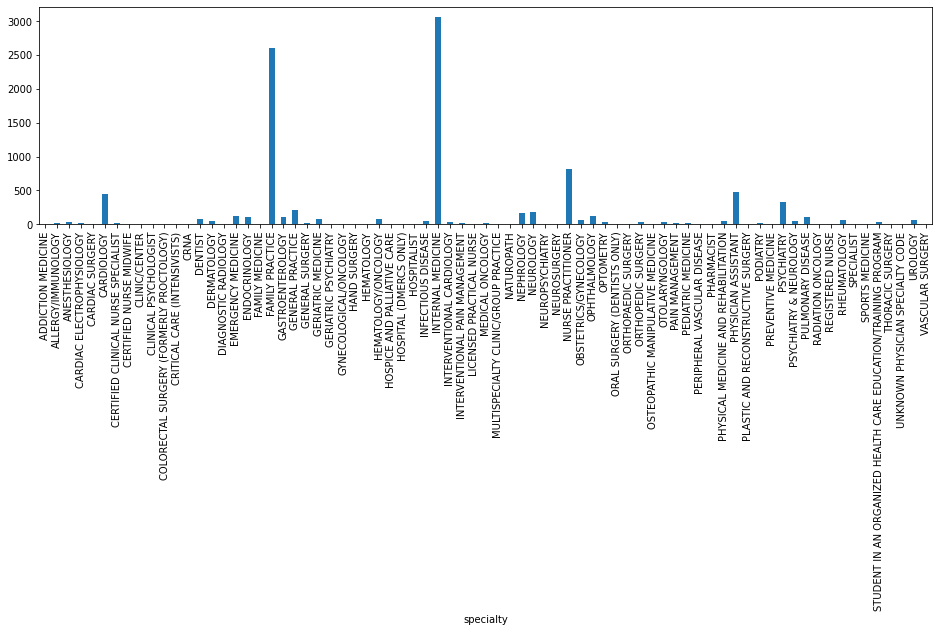

In [81]:
spending_df.groupby('specialty').size().plot.bar(figsize=(16,4))

In [101]:
# We sample only 10% of the Data in each category

def sample_10p(x):
    return x.sample(n=10, replace=True)
    
    
# spending_by_specialty.apply(sample_10p).head()
spending_subsampled_df = spending_df.groupby('specialty').apply(sample_10p)

In [102]:
spending_subsampled_df.head()

doctor_id           specialty     medication  \
specialty          unique_id                                                  
ADDICTION MEDICINE VG585760   1801032297  ADDICTION MEDICINE    LAMOTRIGINE   
                   GJ278932   1134139991  ADDICTION MEDICINE  BUSPIRONE HCL   
                   GJ278932   1134139991  ADDICTION MEDICINE  BUSPIRONE HCL   
                   VG585760   1801032297  ADDICTION MEDICINE    LAMOTRIGINE   
                   VG585760   1801032297  ADDICTION MEDICINE    LAMOTRIGINE   

                              nb_beneficiaries  spending  spending_pct  
specialty          unique_id                                            
ADDICTION MEDICINE VG585760                 11     82.62      8.979849  
                   GJ278932                 49    817.88     88.894203  
                   GJ278932                 49    817.88     88.894203  
                   VG585760                 11     82.62      8.979849  
                   VG585760                 11     82.62      8.979849

In [103]:
spending_subsampled_df.drop("specialty", axis =1 )

doctor_id                  medication  \
specialty          unique_id                                           
ADDICTION MEDICINE VG585760   1801032297                 LAMOTRIGINE   
                   GJ278932   1134139991               BUSPIRONE HCL   
                   GJ278932   1134139991               BUSPIRONE HCL   
                   VG585760   1801032297                 LAMOTRIGINE   
                   VG585760   1801032297                 LAMOTRIGINE   
...                                  ...                         ...   
VASCULAR SURGERY   KL360002   1710981444                    APIXABAN   
                   KL360002   1710981444                    APIXABAN   
                   KL360002   1710981444                    APIXABAN   
                   CU764903   1780885574  ACETAMINOPHEN WITH CODEINE   
                   KL360002   1710981444                    APIXABAN   

                              nb_beneficiaries  spending  spending_pct  
specialty          unique_id                                            
ADDICTION MEDICINE VG585760                 11     82.62      8.979849  
                   GJ278932                 49    817.88     88.894203  
                   GJ278932                 49    817.88     88.894203  
                   VG585760                 11     82.62      8.979849  
                   VG585760                 11     82.62      8.979849  
...                                        ...       ...           ...  
VASCULAR SURGERY   KL360002                 14   4309.59     98.681300  
                   KL360002                 14   4309.59     98.681300  
                   KL360002                 14   4309.59     98.681300  
                   CU764903                 16     57.59      1.318700  
                   KL360002                 14   4309.59     98.681300  

[750 rows x 5 columns]

In [104]:
# Note that we first need to drop the colum
spending_subsampled_df = spending_subsampled_df.drop("specialty", axis =1).reset_index((0,))
spending_subsampled_df

,specialty,doctor_id,medication,nb_beneficiaries,spending,spending_pct
unique_id,,,,,,
VG585760,ADDICTION MEDICINE,1801032297,LAMOTRIGINE,11,82.62,8.979849
GJ278932,ADDICTION MEDICINE,1134139991,BUSPIRONE HCL,49,817.88,88.894203
GJ278932,ADDICTION MEDICINE,1134139991,BUSPIRONE HCL,49,817.88,88.894203
VG585760,ADDICTION MEDICINE,1801032297,LAMOTRIGINE,11,82.62,8.979849
VG585760,ADDICTION MEDICINE,1801032297,LAMOTRIGINE,11,82.62,8.979849
...,...,...,...,...,...,...
KL360002,VASCULAR SURGERY,1710981444,APIXABAN,14,4309.59,98.681300
KL360002,VASCULAR SURGERY,1710981444,APIXABAN,14,4309.59,98.681300
KL360002,VASCULAR SURGERY,1710981444,APIXABAN,14,4309.59,98.681300


<AxesSubplot:xlabel='specialty'>

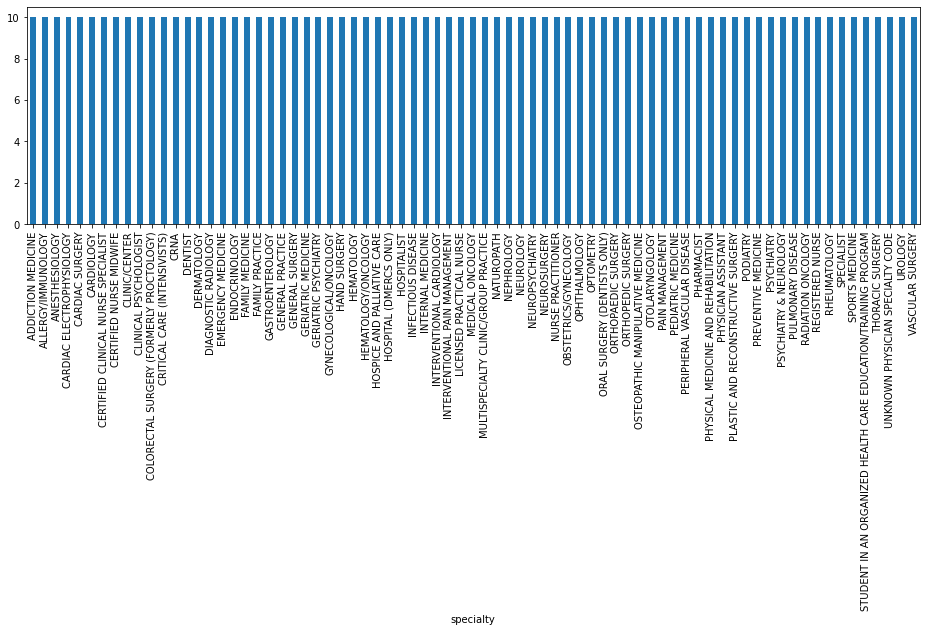

In [105]:
spending_subsampled_df.groupby('specialty').size().plot.bar(figsize=(16,4))